In [14]:
mach_number=0.4
p=4
M=11
L=10.0
p_geo=p
c="c_0"
discretization_type=1

In [15]:
import sys  
import pickle
sys.path.insert(0, '../src')
from Driver import euler_driver
strong = euler_driver(mach_number=mach_number, 
                        p=p, M=M, L=L,
                        p_geo=p_geo, c=c, 
                        discretization_type=discretization_type,
                        form="strong", run=False)
weak = euler_driver(mach_number=mach_number, 
                        p=p, M=M, L=L,
                        p_geo=p_geo, c=c, 
                        discretization_type=discretization_type,
                        form="weak", run=False)

#n_t = 20000 + (p-2)*8000
n_t = 30800

strong.load_solution(time_step=n_t)
strong.post_process(error_quadrature_degree=4*p)
weak.load_solution(time_step=n_t)
weak.post_process(error_quadrature_degree=4*p)

diff = strong.calculate_difference(weak)
strong_cons_error = pickle.load(open("../results/" + strong.params["project_title"] + "/conservation_error.dat", "rb"))
weak_cons_error = pickle.load(open("../results/" + weak.params["project_title"] + "/conservation_error.dat", "rb"))
strong_sol_error = pickle.load(open("../results/" + strong.params["project_title"] + "/solution_error.dat", "rb"))
weak_sol_error = pickle.load(open("../results/" + weak.params["project_title"] + "/solution_error.dat", "rb"))
for e in range(0,4):
    print("& & Eqn", e+1, "&", "{:.3e}".format(diff[e]), " & ",
    "{:.3e}".format(strong_cons_error[e]), "&",
    "{:.3e}".format(weak_cons_error[e]),"\\\\")

ValueError: 

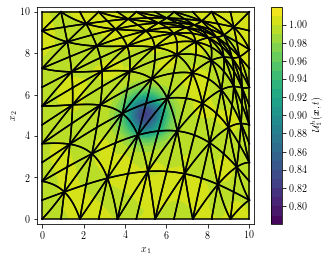

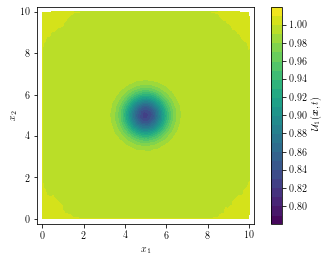

In [3]:
strong.plot(equation_index=0, u_range=[0.8,1.0])
#weak.plot(equation_index=0, u_range=[0.8,1.0])